In [3]:
import os
os.chdir('C:/Users/v-kirdwivedi/Documents/GitHub/MatchingAlgorithm/')

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from funcs import *
from multi_funcs import *

In [3]:
results = gs_f_simulate_nx_max(100, 1000, 5)

Make-demo: 

In [3]:
preferences = mdf_np(1000, 5)
preferences2 =preferences.copy()

In [4]:
matches, _ = run_gale_shapley(preferences, 5)

In [5]:
results = get_max_weight_matching(preferences2, matches, 1000, 5)

ValueError: Length of values (1482) does not match length of index (1286)

In [51]:
preferences2

,0,1,2,student_id,applications,k,matched,rank1,rank2,rank3,underdemanded
0,907,650,536,0,0,0,False,0.064851,0.380796,0.437602,True
1,278,50,602,1,0,0,False,0.397560,0.667055,0.640890,True
2,335,576,894,2,0,0,False,0.242370,0.713819,0.642318,True
3,293,427,348,3,0,0,False,0.303943,0.687392,0.272083,True
4,875,949,214,4,0,0,False,0.118944,0.682046,0.888509,True
...,...,...,...,...,...,...,...,...,...,...,...
995,794,889,185,995,0,0,False,0.313274,0.029774,0.669273,True
996,876,378,230,996,0,0,False,0.575307,0.154207,0.828047,True
997,718,104,957,997,0,0,False,0.076911,0.505851,0.299852,True
998,337,599,667,998,0,0,False,0.894354,0.162108,0.517828,True


In [53]:
results

(5, 832)

In [12]:
preferences = preferences[preferences['student_id'].isin(matches['student_id'])]
preferences.reset_index(inplace = True, drop = True) 

## Step 2: Remove students who got preferred choice
preferences['rejections'] = matches.applications
relevant = preferences[preferences['rejections'] != 0] ## drop all who were never rejected. They will necessarily not point to anyone else. 

## Step 3: For others, keep only preferences above match. 
for i in range(1,5):
    relevant.iloc[:, i] = np.where(relevant['rejections']<i, -100, relevant.iloc[:, i])
relevant.set_index('student_id', inplace = True)
""" pointing = pd.DataFrame(relevant.iloc[:, :3].stack(level = 0)).reset_index()
pointing = pointing[pointing[0] != -100]

## Step 4: Prepare for Tarjan's Algorithm
to_merge = matches.loc[:,[0, 'student_id']]
pointing = pointing.merge(to_merge, on = 0, how = 'left')
pointing = pointing[pointing['student_id_y'].isin(pointing['student_id_x'])] """

" pointing = pd.DataFrame(relevant.iloc[:, :3].stack(level = 0)).reset_index()\npointing = pointing[pointing[0] != -100]\n\n## Step 4: Prepare for Tarjan's Algorithm\nto_merge = matches.loc[:,[0, 'student_id']]\npointing = pointing.merge(to_merge, on = 0, how = 'left')\npointing = pointing[pointing['student_id_y'].isin(pointing['student_id_x'])] "

In [13]:
relevant

,0,1,2,3,4,applications,k,matched,rank1,rank2,rank3,rank4,rank5,underdemanded,rejections
student_id,,,,,,,,,,,,,,,
2,111,426,-100,-100,-100,0,1,False,0.221578,0.280921,0.844750,0.969573,0.481667,True,1
3,70,683,-100,-100,-100,1,3,True,0.654366,0.833761,0.515593,0.492587,0.492587,True,1
4,529,310,971,631,-100,0,1,False,0.471994,0.326483,0.806608,0.400969,0.978477,True,3
5,678,705,590,608,-100,1,2,True,0.275807,0.717442,0.421235,0.608260,0.608260,True,3
7,189,114,-100,-100,-100,1,3,True,0.545760,0.194601,0.707373,0.627509,0.627509,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,9,893,-100,-100,-100,0,1,False,0.033966,0.220116,0.993926,0.496243,0.872584,True,1
991,911,190,-100,-100,-100,0,2,False,0.176086,0.202164,0.925745,0.115459,0.817219,False,1
992,641,343,569,-100,-100,1,2,True,0.114457,0.221550,0.702903,0.838397,0.838397,True,2


In [14]:
pointing = pd.DataFrame(relevant.iloc[:, :5].stack(level = 0)).reset_index()

In [143]:
pointing['weight'] = [3*len(preferences)+1, 3*len(preferences)+1, 3*len(preferences)]*len(relevant)

In [15]:
pointing = pointing[pointing[0] != -100]

In [16]:
pointing.reset_index(inplace = True, drop = True)

In [17]:
pointing

,student_id,level_1,0
0,2,0,111
1,2,1,426
2,3,0,70
3,3,1,683
4,4,0,529
...,...,...,...
1477,996,0,107
1478,996,1,220
1479,996,2,737
1480,996,3,793


In [18]:
l1 = [([3*len(preferences)+1]*(k) + [3*len(preferences)]) for k in relevant.rejections]
l2 = [item for sublist in l1 for item in sublist]

In [19]:
l2

[2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2688,
 2689,
 2688,
 2689,
 2688,
 2689,
 2688,
 2689,
 2689,
 2688,
 2689,
 2688,

In [20]:
pointing['weight'] = l2

In [21]:
pointing

,student_id,level_1,0,weight
0,2,0,111,2689
1,2,1,426,2688
2,3,0,70,2689
3,3,1,683,2688
4,4,0,529,2689
...,...,...,...,...
1477,996,0,107,2689
1478,996,1,220,2689
1479,996,2,737,2689
1480,996,3,793,2689


In [151]:
first_match_schools = matches[matches['applications'] == 0][0]

In [152]:
pointing = pointing[~(pointing[0].isin(first_match_schools))]

In [153]:
pointing

,student_id,level_1,0,weight
1,1,1,452,2554
2,1,2,452,2553
3,3,0,275,2554
4,3,1,772,2553
5,4,0,341,2554
...,...,...,...,...
935,992,2,721,2553
936,993,0,970,2554
938,999,0,456,2554
939,999,1,936,2554


So now we're exclusively pointing to schools that are not paired to a student who had them top of their list! Note the school ids still don't really mean anything here. 

In [154]:
pointing[0] = pointing[0].astype(str)+'S'

In [155]:
pointing

,student_id,level_1,0,weight
1,1,1,452S,2554
2,1,2,452S,2553
3,3,0,275S,2554
4,3,1,772S,2553
5,4,0,341S,2554
...,...,...,...,...
935,992,2,721S,2553
936,993,0,970S,2554
938,999,0,456S,2554
939,999,1,936S,2554


In [156]:
pointing.drop('level_1', axis = 1, inplace = True)

In [157]:
pointing

,student_id,0,weight
1,1,452S,2554
2,1,452S,2553
3,3,275S,2554
4,3,772S,2553
5,4,341S,2554
...,...,...,...
935,992,721S,2553
936,993,970S,2554
938,999,456S,2554
939,999,936S,2554


In [158]:
pointing.columns = ['source', 'target', 'weight']

In [159]:
G = nx.Graph()

In [160]:
G= nx.from_pandas_edgelist(pointing, edge_attr = True)

In [161]:
max_weight_matching = nx.max_weight_matching(G)

In [162]:
len(max_weight_matching)

401

In [163]:
max_matches = pd.DataFrame(max_weight_matching)

In [164]:
matches = matches[matches['applications']!=0]

In [165]:
matches = matches[[0, 'student_id']]

In [166]:
matches[0]= matches[0].astype(str)+'S'

In [167]:
matches

,0,student_id
0,452S,1
2,275S,3
3,719S,4
5,842S,7
6,503S,8
...,...,...
840,580S,984
842,557S,986
846,721S,992
847,970S,993


In [168]:
mask = max_matches[0].isin(matches[0])

In [169]:
max_matches['school_id'] = np.where(max_matches[0].isin(matches[0]), max_matches[0], max_matches[1])
max_matches['student_id'] = np.where(max_matches[0].isin(matches[0]), max_matches[1], max_matches[0])

In [170]:
max_matches

,0,1,school_id,student_id
0,362,933S,933S,362
1,662S,771,662S,771
2,817S,916,817S,916
3,325S,807,325S,807
4,254S,62,254S,62
...,...,...,...,...
396,503S,8,503S,8
397,907S,400,907S,400
398,1,452S,452S,1
399,111S,206,111S,206


In [175]:
x2 = set(zip(max_matches['school_id'], max_matches['student_id']))

In [176]:
x1 = set(zip(matches[0], matches['student_id']))

In [179]:
x1.difference(x2)

{('111S', 510),
 ('128S', 974),
 ('136S', 671),
 ('157S', 970),
 ('177S', 853),
 ('218S', 10),
 ('248S', 657),
 ('249S', 191),
 ('264S', 206),
 ('334S', 408),
 ('351S', 438),
 ('394S', 304),
 ('411S', 968),
 ('455S', 305),
 ('456S', 615),
 ('459S', 18),
 ('468S', 924),
 ('474S', 384),
 ('475S', 638),
 ('489S', 223),
 ('495S', 128),
 ('515S', 502),
 ('517S', 565),
 ('547S', 712),
 ('564S', 375),
 ('571S', 751),
 ('579S', 917),
 ('601S', 605),
 ('633S', 837),
 ('636S', 152),
 ('644S', 419),
 ('655S', 122),
 ('680S', 400),
 ('6S', 431),
 ('70S', 172),
 ('715S', 158),
 ('716S', 951),
 ('722S', 307),
 ('731S', 555),
 ('791S', 397),
 ('801S', 151),
 ('856S', 389),
 ('859S', 314),
 ('907S', 781),
 ('90S', 833),
 ('936S', 999),
 ('943S', 789),
 ('955S', 127),
 ('958S', 821),
 ('991S', 492)}

Starting to look pretty good. Definitely have the right approach. Just need to get it exactly right so that we can start comparing stuff. I'm excited. I think we're very nearly there. Yay. 

### Running the Experiments

In [4]:
n_list = list(np.arange(25, 1025, 25))
k_list = list(np.arange(3, 11, 1))

In [5]:
for n in n_list:
    for k in k_list:
        results = gs_f_simulate_nx_max(100, n, k)
        make_df_max_match(n, k, results, save = True)
        print('Done with n = ' + str(n) + ' and k = ' + str(k))
        

Done with n = 25 and k = 3
Done with n = 25 and k = 4
Done with n = 25 and k = 5
Done with n = 25 and k = 6
Done with n = 25 and k = 7
Done with n = 25 and k = 8
Done with n = 25 and k = 9
Done with n = 25 and k = 10
Done with n = 50 and k = 3
Done with n = 50 and k = 4
Done with n = 50 and k = 5
Done with n = 50 and k = 6
Done with n = 50 and k = 7
Done with n = 50 and k = 8
Done with n = 50 and k = 9
Done with n = 50 and k = 10
Done with n = 75 and k = 3
Done with n = 75 and k = 4
Done with n = 75 and k = 5
Done with n = 75 and k = 6
Done with n = 75 and k = 7
Done with n = 75 and k = 8
Done with n = 75 and k = 9
Done with n = 75 and k = 10
Done with n = 100 and k = 3
Done with n = 100 and k = 4
Done with n = 100 and k = 5
Done with n = 100 and k = 6
Done with n = 100 and k = 7
Done with n = 100 and k = 8
Done with n = 100 and k = 9
Done with n = 100 and k = 10
Done with n = 125 and k = 3
Done with n = 125 and k = 4
Done with n = 125 and k = 5
Done with n = 125 and k = 6
Done with n 

Now time to plot the results:

In [5]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/max_matches')]

In [7]:
df = concat(onlyfiles, 'data/simulations/max_matches/')

In [8]:
df

,Unnamed: 0,n,k,n_changes,n_matches,percent_changed
0,0,1000,10,319,964,0.330913
1,1,1000,10,335,965,0.347150
2,2,1000,10,326,971,0.335736
3,3,1000,10,287,966,0.297101
4,4,1000,10,352,958,0.367432
...,...,...,...,...,...,...
31995,95,975,9,255,937,0.272145
31996,96,975,9,309,935,0.330481
31997,97,975,9,284,931,0.305048
31998,98,975,9,338,932,0.362661


Text(0, 0.5, 'Percent Changed between Max_Matchings and GS')

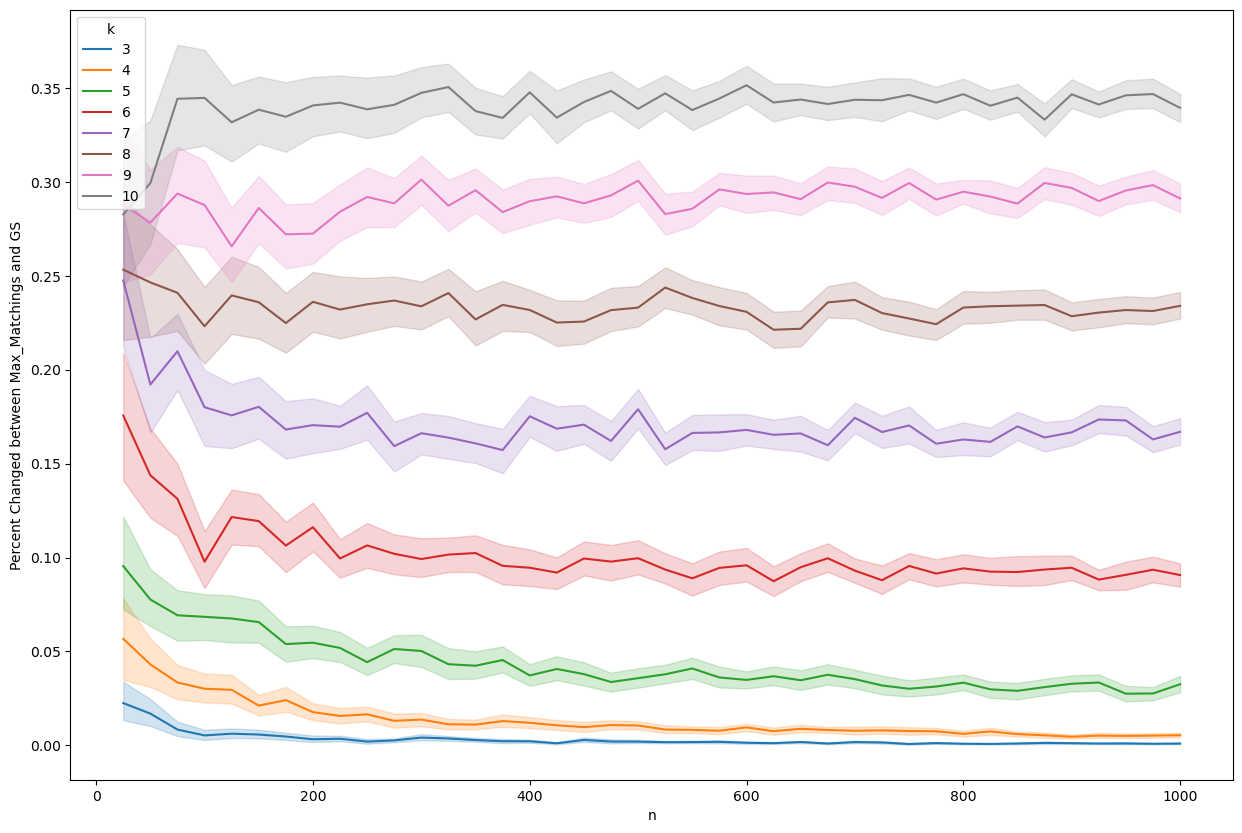

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x="n", y="percent_changed", hue="k", data=df, ax=ax, palette="tab10", errorbar=("ci", 95))
ax.set_ylabel("Percent Changed between Max_Matchings and GS")
